In [2]:
import scipy.signal as sig
import numpy as np
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
from fixedpoint import FixedPoint


def fixedToFloat(array):
    result = []
    for num in array:
      result.append(float(num))
    return result

def arrayFixedPointValue(initial_value, fx_array_len, qformat):
    # Retorna: un array con initial_value en todas sus posiciones, de longitud
    # fx_array_len, con el formato
    # qformat = {'signed': <True/False>, 'm': <BitsEnteros>, 'n': <BitsFracc>}
    fx_type = FixedPoint(initial_value, **qformat)
    fx_array = [fx_type for _ in range(fx_array_len)]
    return fx_array

def arrayFixedPoint(initial_array, qformat):
    # Retorna: un array con los valores de initial_array convertidos
    # a fixed point, de la misma longitud
    # con el formato
    # qformat = {'signed': <True/False>, 'm': <BitsEnteros>, 'n': <BitsFracc>}
    fx_array = []
    for num in initial_array:
      fx_num = FixedPoint(num, **qformat)
      fx_array.append(fx_num)
    return fx_array

## Remez Exchange

Para calcular los coeficientes del filtro con este método, se usa la siguiente función de scipy:

scipy.signal.remez(numtaps, bands, desired, weight=None, Hz=None, type='bandpass', maxiter=25, grid_density=16, fs=None)

Calculate the minimax optimal filter using the Remez exchange algorithm.

Calculate the filter-coefficients for the finite impulse response (FIR) filter whose transfer function minimizes the maximum error between the desired gain and the realized gain in the specified frequency bands using the Remez exchange algorithm.

C:\Users\marti\AppData\Local\Temp\ipykernel_18796\2157416952.py:29: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(w, 20 * np.log10(abs(hq)), 'r', label='Punto Fijo', linewidth=2)


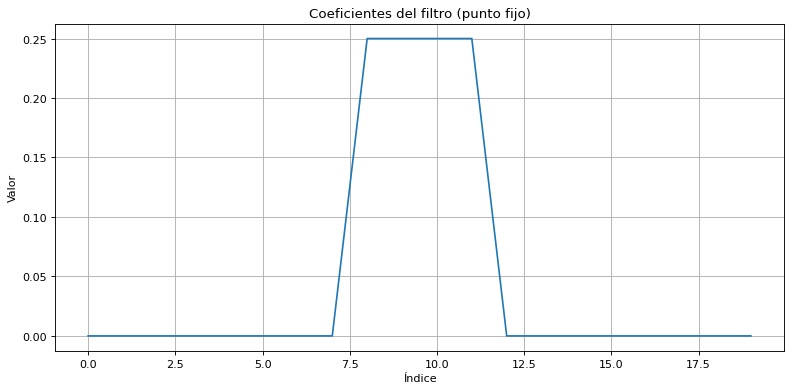

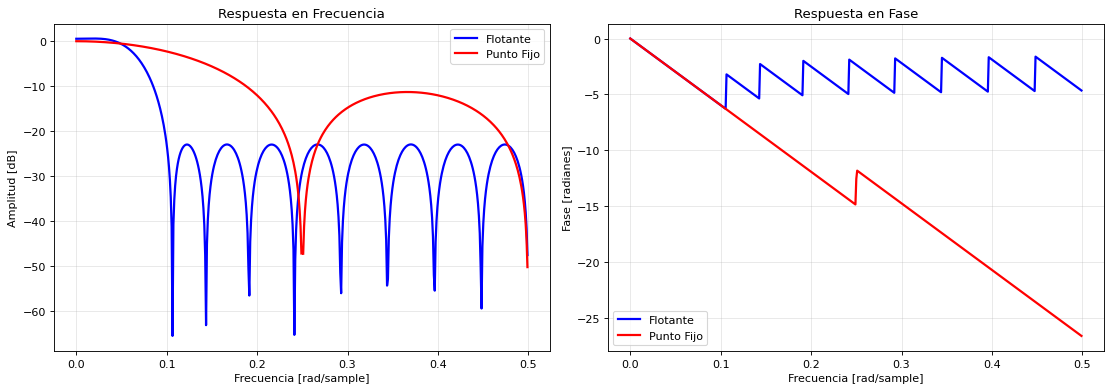

In [4]:
qformat = {'signed': True, 'm': 6, 'n': 2}
b = sig.remez(20, [0, 0.05, 0.10, 0.5], [1, 0], maxiter=100)
c = arrayFixedPoint(b, qformat)

# Primer gráfico: Coeficientes del filtro en punto fijo
fig1, ax1 = plt.subplots(num=None, figsize=(10, 5), dpi=80)
ax1.plot(c)
ax1.set_title('Coeficientes del filtro (punto fijo)')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')
ax1.grid()
fig1.tight_layout()

# Calcular respuestas en frecuencia y fase
w, h = sig.freqz(b)
w, hq = sig.freqz(c)
w = w / (2 * np.pi)

# Calcular ángulos
angles = np.unwrap(np.angle(h))
angles_q = np.unwrap(np.angle(hq))

# Segundo gráfico: Respuesta en frecuencia y fase en dos subplots horizontales
fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(14, 5), dpi=80)

# Subplot 1: Respuesta en frecuencia
ax2.set_title('Respuesta en Frecuencia')
ax2.plot(w, 20 * np.log10(abs(h)), 'b', label='Flotante', linewidth=2)
ax2.plot(w, 20 * np.log10(abs(hq)), 'r', label='Punto Fijo', linewidth=2)
ax2.set_ylabel('Amplitud [dB]')
ax2.set_xlabel('Frecuencia [rad/sample]')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Subplot 2: Respuesta en fase
ax3.set_title('Respuesta en Fase')
ax3.plot(w, angles, 'b', label='Flotante', linewidth=2)
ax3.plot(w, angles_q, 'r', label='Punto Fijo', linewidth=2)
ax3.set_ylabel('Fase [radianes]')
ax3.set_xlabel('Frecuencia [rad/sample]')
ax3.grid(True, alpha=0.3)
ax3.legend()

fig2.tight_layout()
plt.show()